<a href="https://colab.research.google.com/github/tomepm/Reconocimiento-de-Patrones-y-Aprendizaje-de-Maquina/blob/main/Ejercicio_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3**
### **Presentado por:** *Pablo Tomé*
**Ejercicio 3.3:** En el notebook https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/musica.ipynb hay un dataset con 2000+ canciones de Spotify de una usuaria, donde algunas fueron marcadas como gustadas y otras no. Cada canción tiene a su vez 16 atributos (nombre, artista, duración, bailable, etc.). Desarrollar un clasificador que prediga si una canción dada va a ser gustada o no. Aclarar y justificar los pasos, analizar y explicar los resultados.

In [ ]:
# Importo librerias para trabajar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Carga del dataset
df_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
df_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


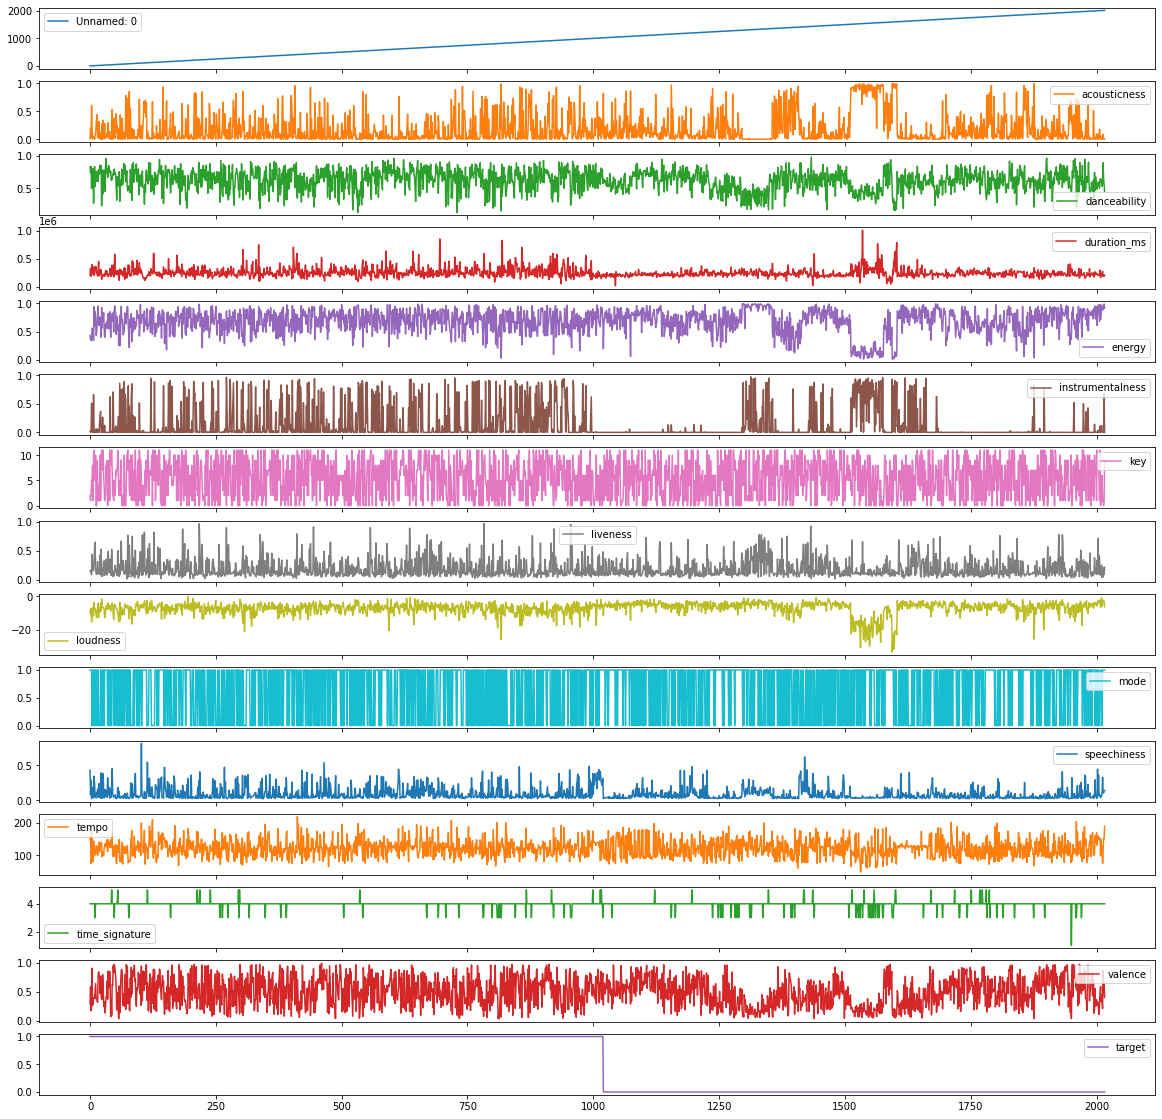

In [ ]:
df_spotify.plot(label='target', subplots=True, figsize=(20,20))
plt.show()

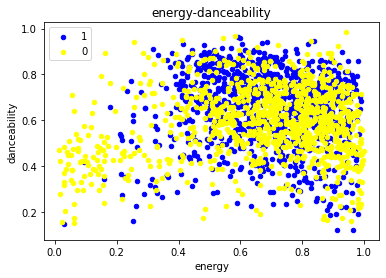

In [ ]:
fig = df_spotify[df_spotify.target == 1].plot(kind='scatter', x='energy', y='danceability', color='blue', label='1')
df_spotify[df_spotify.target == 0].plot(kind='scatter', x='energy', y='danceability', color='yellow', label='0', ax=fig)
fig.set_xlabel('energy')
fig.set_ylabel('danceability')
fig.set_title('energy-danceability')
plt.show()

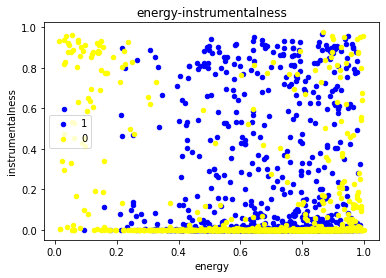

In [ ]:
fig = df_spotify[df_spotify.target == 1].plot(kind='scatter', x='energy', y='instrumentalness', color='blue', label='1')
df_spotify[df_spotify.target == 0].plot(kind='scatter', x='energy', y='instrumentalness', color='yellow', label='0', ax=fig)
fig.set_xlabel('energy')
fig.set_ylabel('instrumentalness')
fig.set_title('energy-instrumentalness')
plt.show()

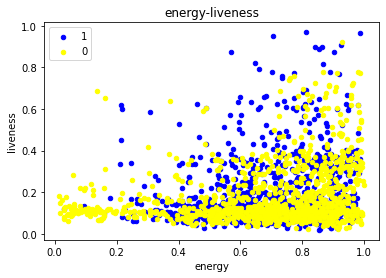

In [ ]:
fig = df_spotify[df_spotify.target == 1].plot(kind='scatter', x='energy', y='liveness', color='blue', label='1')
df_spotify[df_spotify.target == 0].plot(kind='scatter', x='energy', y='liveness', color='yellow', label='0', ax=fig)
fig.set_xlabel('energy')
fig.set_ylabel('liveness')
fig.set_title('energy-liveness')
plt.show()

In [ ]:
# Se eliminan atributos que no aportan al trabajo
df_x1 = np.array(df_spotify.drop(['target','key','mode','time_signature','song_title','artist','Unnamed: 0'], 1))
df_y1 = np.array(df_spotify['target'])
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(df_x1, df_y1)
df_y1_pred = knn.predict(df_x1)

print('Tipo de dato de df_x1', type(df_x1), sep=' ==> ')
print('Tipo de dato de df_y1', type(df_y1), sep=' ==> ')

print('Precisión Vecinos más Cercanos: {}'.format(knn.score(df_x1, df_y1)))
print(knn.predict_proba([[0.01020,0.833,204600,0.434,0.021900, 0.1650,-8.795,0.4310,150.062,0.286]]))
print(knn.predict([[0.01020,0.833,204600,0.434,0.021900, 0.1650,-8.795,0.4310,150.062,0.286]]))

Tipo de dato de df_x1 ==> <class 'numpy.ndarray'>
Tipo de dato de df_y1 ==> <class 'numpy.ndarray'>
Precisión Vecinos más Cercanos: 0.6717897868120972
[[0.8 0.2]]
[0]


<ipython-input-9-33b2c76d26d0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_x1 = np.array(df_spotify.drop(['target','key','mode','time_signature','song_title','artist','Unnamed: 0'], 1))


In [ ]:
scaler = StandardScaler()

df_x2 = np.array(df_spotify.drop(['target','key','mode','time_signature','song_title','artist','Unnamed: 0'], 1))
df_y2 = np.array(df_spotify['target'])
scaler.fit(df_x2)
df_x2_new = scaler.transform(df_x2)

print('Tipo de dato de df_x2', type(df_x2), sep=' ==> ')
print('Tipo de dato de df_y2', type(df_y2), sep=' ==> ')
print('Tipo de dato de df_x2_new', type(df_x2_new), sep=' ==> ')

df_x2_normal = pd.DataFrame(df_x2_new)

print('Tipo de dato de df_x2_normal', type(df_x2_normal), sep=' ==> ')

df_x2_normal

Tipo de dato de df_x2 ==> <class 'numpy.ndarray'>
Tipo de dato de df_y2 ==> <class 'numpy.ndarray'>
Tipo de dato de df_x2_new ==> <class 'numpy.ndarray'>
Tipo de dato de df_x2_normal ==> <class 'pandas.core.frame.DataFrame'>


<ipython-input-11-3b483cb7abc7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_x2 = np.array(df_spotify.drop(['target','key','mode','time_signature','song_title','artist','Unnamed: 0'], 1))


,0,1,2,3,4,5,6,7,8,9
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.346454,-0.881573,-0.147529,1.442323,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.204897,-0.016586,2.183712,-1.745166,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.634715,-2.167220,-0.740350,-1.316964,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,1.596735,-1.213155,-0.258753,1.964120,1.647627
...,...,...,...,...,...,...,...,...,...,...
2012,-0.717631,-0.213815,0.342817,1.191237,-0.478206,-0.397929,0.953167,2.673095,-1.747715,-1.156518
2013,-0.384304,1.711782,-0.782370,1.000961,-0.481941,-0.888231,1.175995,0.426383,-0.433385,1.497911
2014,-0.688738,0.115400,-0.477129,1.205508,-0.473446,0.148995,1.228112,0.159447,1.067459,-0.108504
2015,-0.715399,-0.381529,-0.740667,1.476651,1.990939,-0.640506,1.156850,0.448628,1.064798,0.510593


In [ ]:
df_x2_train, df_x2_test, df_y2_train, df_y2_test = train_test_split(df_x2_normal, df_y2, test_size=0.1)

print('Tipo de dato de df_x2_train', type(df_x2_train), sep=' ==> ')
print('Tipo de dato de df_x2_test', type(df_x2_test), sep=' ==> ')
print('Tipo de dato de df_y2_train', type(df_y2_train), sep=' ==> ')
print('Tipo de dato de df_y2_test', type(df_y2_test), sep=' ==> ')

print('Son {} datos para entrenamiento y {} datos para prueba'.format(df_x2_train.shape[0], df_x2_test.shape[0]))

Tipo de dato de df_x2_train ==> <class 'pandas.core.frame.DataFrame'>
Tipo de dato de df_x2_test ==> <class 'pandas.core.frame.DataFrame'>
Tipo de dato de df_y2_train ==> <class 'numpy.ndarray'>
Tipo de dato de df_y2_test ==> <class 'numpy.ndarray'>
Son 1815 datos para entrenamiento y 202 datos para prueba


In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(df_x2_train, df_y2_train)
Y_pred = knn.predict(df_x2_test)

print('Tipo de dato de Y_pred', type(Y_pred), sep=' ==> ')

print('Precisión Vecinos más Cercanos: {}'.format(knn.score(df_x2, df_y2)))
print(knn.predict_proba([[-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039]]))
print(knn.predict([[-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039]]))

Tipo de dato de Y_pred ==> <class 'numpy.ndarray'>
Precisión Vecinos más Cercanos: 0.5057015369360436
[[0.1 0.9]]
[1]


Se ha utilizado un dataset con aproximadamente 2000 canciones, el mismo contiene 16 atributos incluyendo un target que define si dicha canción fue de gusto del usuario. Se analizó la importancia de cada atributo mediante la visualización de los datos y la correlación utilizando la función. corr(), los atributos que no definieron si una canción es de gusto del usuario fueron eliminados, se determinó que uno de los atributos con mayor peso era "energy". El siguiente paso fue llamar al clasificador K vecinos más cercanos de la librería sklearn usando el código. KNeighborsClassifier. Observamos resultados para n_neighbors = 10 y distribución de datos: [0.01020,0.833,204600,0.434,0.021900, 0.1650,-8.795,0.4310,150.062,0.286]

n_neighbors = 10.
Precisión Vecinos más Cercanos: 0.6717897868120972, porcentaje para cada etiqueta [[0.8 0.2]].Etiqueta seleccionada: [0]

En esta parte pensaríamos que el clasificador está trabajando de manera correcta, sin embargo, los datos ingresados deberían predecir que la canción si es de gusto del usuario (1).

Para corregir este error se garantiza que el modelo no sea sensible a la escala arbitraria de los datos, para ello, se estandarizó los datos eliminando la media y escalando a la varianza de la unidad mediante la función StandardScaler(). Se realizó un proceso de entrenamiento y observamos resultados para n_neighbors = 10. Se probó el clasificador con la siguiente distribución de datos: [-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039] n_neighbors = 10.

Precisión Vecinos más Cercanos: 0.5057015369360436, porcentaje para cada etiqueta [[0.1 0.9]].Etiqueta seleccionada: [1]